# Getting Started 
Scikit-learn contains a number of [datasets](https://scikit-learn.org/stable/datasets.html) pre-loaded with the library, within the namespace of` sklearn.datasets`. The `load_digits()` function returns a copy of the [hand-written digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values (64 columns for 8 x 8 pixels). To visualize an image from the dataframe, we first need to reshape the image back to its original dimensions (8 x 8 pixels). We then need to plot the resulting matrix (8 x 8)on a coordinate grid to visualize the image.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import load_digits() from the sklearn.datasets package 
data=load_digits() # returns a dictionary
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# Let's use relvant keys from the data dictionary to fetch features and labels
features= data['data']
features=pd.DataFrame(features)
labels=data["target"]
labels=pd.Series(labels)
features.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
labels.head(10)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

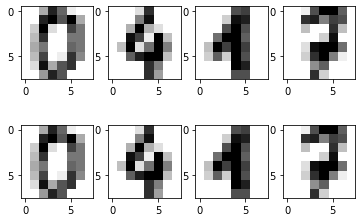

In [5]:
# Using matplotlib to visualize some of the images in the dataset
array=[[0,100,200,300],
       [1000,1100,1200,1300]]
pos=1
for i in range(len(array)):
    row=array[0]
    for element in row:
        first_image=features.iloc[element]
        np_image=first_image.values
        np_image=np_image.reshape(8,8)
        ax=plt.subplot(2,4,pos)
        ax.imshow(np_image,cmap='gray_r')
        pos+=1
plt.show()

# KNeighbors Classification

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. K-nearest neighbors don't have a specific model representation (hence it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

Let's:
1. Write a function named `train()` that uses KNeighborsClassifer for training k-nearest neighbors models
2. Write a function named `test`() that tests the model
3. Write a function named `cross_validate`() that performs 4-fold cross validation using `train`() and `test`()

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def train(train_features, train_labels,nneighbors=5):
  knn=KNeighborsClassifier(n_neighbors=nneighbors)
  knn.fit(train_features,train_labels)
  return knn

def test(model,test_features,test_labels):  
  predictions=model.predict(test_features)
  accuracy=accuracy_score(test_labels,predictions)
  return round(accuracy*100,2)
  
def cross_validate(k=4):
  kf=KFold(n_splits=k,random_state=1,shuffle=True)
  accuracies=[]
  for train_index, test_index in kf.split(features):
    X_train, y_train= features.loc[train_index],labels.loc[train_index]
    X_test, y_test = features.loc[test_index],labels.loc[test_index]
    model=train(X_train,y_train)
    accuracies.append(test(model,X_test,y_test))
  return accuracies

cross_validate()

[99.33, 97.1, 98.66, 98.22]

Let's now use the functions above to cross validate our algorithm. We'll use KFolds Cross Validation technique to see how our algorithm performs on different test sets created from the data by the KFold method. 

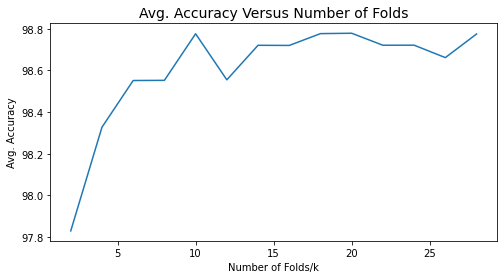

In [7]:
folds=list(range(2,30,2))
mean_accuracies=[]
for k in folds:
  accuracies=cross_validate(k)
  mean_accuracy=np.mean(accuracies)
  mean_accuracies.append(mean_accuracy)
plt.figure(figsize=(8,4))
plt.plot(folds,mean_accuracies)
plt.ylabel("Avg. Accuracy")
plt.xlabel("Number of Folds/k")
plt.title("Avg. Accuracy Versus Number of Folds",size=14)
plt.show()



The above graph shows:
- Average accuracy of our algorithm improved as we increased number of folds from 2 to 10 (we decrease bias by splitting our dataset in many train/test samples)
- Average accuracy stabalized after 10 folds (after decent number of splits, the scope of bais control limits and accuracy stabalizes)


# Feedforward Neural Network/MLP Classifier

There are a few downsides to using k-nearest neighbors:

1. High memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
2. No model representation to debug and explore
3. Let's now try a neural network with a single hidden layer. We'll use the `MLPClassifier` package from scikit-learn.

In [8]:
from sklearn.neural_network import MLPClassifier

def train(train_features, train_labels, nneurons=(5,)):
  mlp=MLPClassifier(hidden_layer_sizes=(nneurons))
  mlp.fit(train_features,train_labels)
  return mlp

def test(model,test_features,test_labels):
  predictions=model.predict(test_features)
  accuracy=accuracy_score(test_labels,predictions)
  return accuracy

def cross_validate(k,nneurons):
  kf=KFold(n_splits=k,random_state=1,shuffle=True)
  test_accuracies=[]
  train_accuracies=[]
  for train_index, test_index in kf.split(features):
    X_train, y_train= features.loc[train_index],labels.loc[train_index]
    X_test, y_test = features.loc[test_index],labels.loc[test_index]
    model=train(X_train,y_train,nneurons)
    test_accuracies.append(test(model,X_test,y_test))
    train_accuracies.append(test(model,X_train,y_train))
  
  return test_accuracies,train_accuracies


Using 4-fold cross validation let's now:

- Train and test a neural network model using a single hidden layer of 8 neurons.
- Train and test a neural network model using a single hidden layer of 16 neurons.
- Train and test a neural network model using a single hidden layer of 32 neurons.
- Train and test a neural network model using a single hidden layer of 64 neurons.
- Train and test a neural network model using a single hidden layer of 128 neurons.
- Train and test a neural network model using a single hidden layer of 256 neurons.

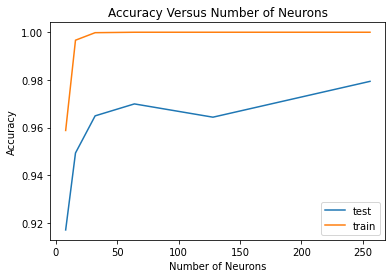

In [9]:
nneurons=[(8,),
          (16,),
          (32,),
          (64,),
          (128,),
          (256,)]
test_accuracies=[]
train_accuracies=[]
for nneuron in nneurons:
  test_accuracy,train_accuracy=cross_validate(4,nneuron)
  test_accuracies.append(test_accuracy)
  train_accuracies.append(train_accuracy)
  
mean_test_accuracy=np.mean(test_accuracies,axis=1)
mean_train_accuracy=np.mean(train_accuracies,axis=1)
plt.plot(nneurons,mean_test_accuracy,label="test")
plt.plot(nneurons,mean_train_accuracy,label="train")
plt.xlabel("Number of Neurons")
plt.ylabel("Accuracy")
plt.title("Accuracy Versus Number of Neurons")
plt.legend()
plt.show()

Above graphs shows that:
1. Adding more neurons to a single hidden layer vastly improved the classification accuracy
2. When number of neurons in our single hidden layer model were low, accuracies for both test and train sets were at lower side
3. The difference between train and test accuracies at different number of neurons seems similar and is not very large. This means: 
   - MLP classifier with one hidden layer is not overfitting extravagently
   - Regardless of the number of neurons in the hidden layer, the extent of overfitting remains the same 
   - Accuracies of individual sets increase initialy and converge as number of neurons increase 

Let's try using two hidden layers (each containing 64 neurons) and perfrom 4 fold validation.


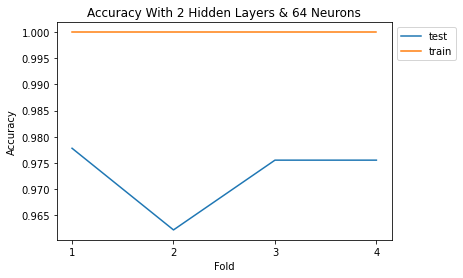

In [10]:
nneurons=(64,64)

test_accuracy,train_accuracy=cross_validate(4,nneurons)
plt.plot([1,2,3,4],test_accuracy,label="test")
plt.plot([1,2,3,4],train_accuracy,label="train")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy With 2 Hidden Layers & 64 Neurons")
plt.xticks([1,2,3,4])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The above graph shows that:
1. Two hidden layers are overfitting (better accuracy on training set)
2. Two hidden layers perfromed almost as good as single layer did with 64 neurons 

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers

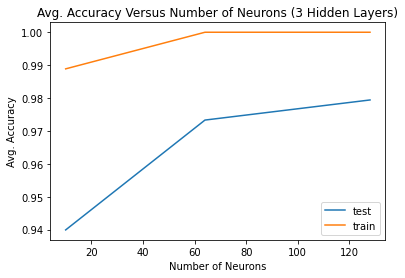

In [11]:
nneurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

test_accuracies=[]
train_accuracies=[]
for nneuron in nneurons:
  test_accuracy,train_accuracy=cross_validate(6,nneuron)
  test_accuracies.append(test_accuracy)
  train_accuracies.append(train_accuracy)
  
mean_test_accuracy=np.mean(test_accuracies,axis=1)
mean_train_accuracy=np.mean(train_accuracies,axis=1)
plt.plot([10,64,128],mean_test_accuracy,label='test')
plt.plot([10,64,128],mean_train_accuracy,label='train')
plt.xlabel("Number of Neurons")
plt.ylabel("Avg. Accuracy")
plt.title("Avg. Accuracy Versus Number of Neurons (3 Hidden Layers)")
plt.legend()
plt.show()
  


Above graph shows that:
- Increasing hidden layers from 2 to 3 redcued the difference between train test accuracies (it reduced the problem of overfitting)
- Moreover, average test accuracy appraoched 98% even with 6 folds cross validation (indicating that the model is generalizing fairly well). 